<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/04_svd_multilinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVD:Multi-Linear Regression-Cement heat generation data

Regression is an important statistical tool to relate variables to one another based on data.

We assume that the data is linearly related, and we use the pseudo-inverse to find the least-squares solution for the slope x below (blue dashed line).

$$ Ax = b $$
$$ A = U \Sigma V^T $$
$$ x = A^{-1}b $$
$$ x = \left ( U \Sigma V^T \right )^{-1} b $$
$$ x = \tilde V \tilde \Sigma^{-1} \tilde U^* b $$

Where, $\tilde \Sigma = ||a||_2, \tilde V = 1$ and $\tilde U = \frac {a}{||a||_2}$. so we can take the left pseudo-inverse.

$$ x = \frac {a*b}{||a||_2^2} $$

<img src='images/svd3.png' width='400'/>

This makes physical sense, if we think of $x$ as the value that best maps our vector $a$ to the vector $b$. Then, the best single value $x$ is obtained by taking the dot product of $b$ with the normalized $a$ direction. We then add a second normalization factor $||a||_2$ because the $a$ in is not normalized.


Note that strange things happen if you use row vectors instead of column vectors. 

Also, if the noise magnitude becomes large relative to the slope $x$, the pseudoinverse will undergo a phase-change in accuracy, related to the hard-thresholding results.

##Setup

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

##Linear Regression

Let's generate noisy data.

In [3]:
x = 3 # True slope
a = np.arange(-2, 2, 0.25)
a = a.reshape(-1, 1)
b = x * a + np.random.randn(*a.shape)  # Add noise

Let's compute least-squares approximation.

In [4]:
# The procedure below is called linear regression in statistics
U, S, VT = np.linalg.svd(a, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b  # Least-square fit

Let's plot the fit.

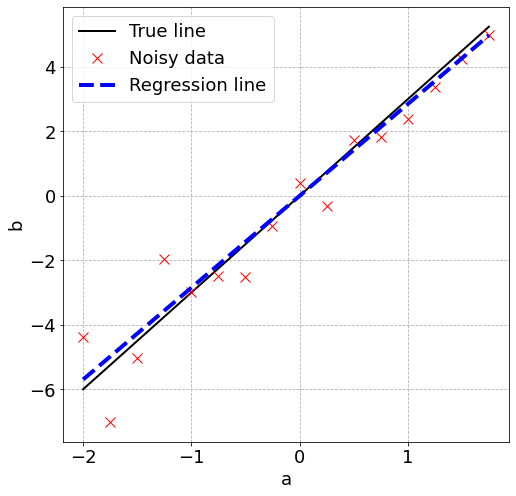

In [5]:
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements

plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()